## Sports Analytics Notebook
#### by Trevor Alback started 1/4/2022
#### last update 29/12/2022

In [1]:
# This NBA api is somewhat free, if you sign up, you can get free calls, but not to all data.
# Below is the set-up, just replace the key if you sign up. Below I access a python nba package

import http.client

conn = http.client.HTTPSConnection("api-nba-v1.p.rapidapi.com")

headers = {
    'X-RapidAPI-Host': "api-nba-v1.p.rapidapi.com",
    'X-RapidAPI-Key': "a77dba0749mshc84499458a980c3p12cfbcjsn2aee80739e7e"
    }

conn.request("GET", "/seasons", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"message":"You are not subscribed to this API."}


In [2]:
## There is an nba_api package which is an api client to get data from nba.com
## https://pypi.org/project/nba-api/

In [3]:
# pip install the package to access the libraries
# pip install nba_api

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt

In [5]:
# Example data extract below: find league leaders
# Access leagueleaders module through endpoints & assign the class to "data"
data = endpoints.leagueleaders.LeagueLeaders() 

# Create a league leaders data frame (ll_df) using "data" variable and its built in functions
ll_df = data.league_leaders.get_data_frame()

In [6]:
ll_df.head()

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1629029,1,Luka Doncic,1610612742,DAL,32,1183,365,721,0.506,...,278,280,54,18,120,94,1076,1141,2.33,0.45
1,1628369,2,Jayson Tatum,1610612738,BOS,33,1220,337,707,0.477,...,266,136,39,29,88,71,1026,1001,1.54,0.44
2,201142,3,Kevin Durant,1610612751,BKN,34,1238,362,646,0.560,...,235,182,27,52,120,84,1016,1090,1.52,0.23
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,31,1111,325,643,0.505,...,151,180,53,34,105,81,976,947,1.71,0.51
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,29,973,330,623,0.530,...,335,150,25,26,110,105,919,921,1.36,0.23


In [7]:
print(ll_df.shape)
ll_df.columns

(489, 28)


Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV'],
      dtype='object')

In [8]:
#ll_df.info()

In [9]:
## See endpoints
#help(endpoints)

What are we looking for? Let's import player info from static and test some example unique ID's
See bottom of below link for reference on accessing player and team id's
https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb

In [10]:
from nba_api.stats.static import players
nba_players = players.get_players()
nba_players[:3]

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False}]

In [11]:
# Find a unique player id for a player by full name
# Names are case sensitive
# utilise both .format and f string for the text visual output
KD = [player for player in nba_players if player['full_name'] == 'Kevin Durant'][0]
print('Kevin info: {}'.format(KD))
print('--------')
KD_ID = KD['id']
f'Kevin unique ID: {KD_ID}'

Kevin info: {'id': 201142, 'full_name': 'Kevin Durant', 'first_name': 'Kevin', 'last_name': 'Durant', 'is_active': True}
--------


'Kevin unique ID: 201142'

In [12]:
print('Number of players fetched: {}'.format(len(nba_players)))

Number of players fetched: 4723


In [13]:
# Example accessing dictionary items matching a condition
d = {"foo": 1, "bar": 2, "baz": 1}
keys_for_1 = [k for k in d if d[k] == 1]
print(keys_for_1)

['foo', 'baz']


I wanted to see how many players in this list had the last name 'Jordan'. I wondered how many more 'Jordans' there were on top of Michael Jordan and DeAndre Jordan.  

I loop through the list of dictionaries for a last name matching 'Jordan'.

In [14]:
how_many_Jordans = 0
Jordans_info = []
for i in range(len(nba_players)):
    if nba_players[i]['last_name'] == 'Jordan':
        Jordans_info.append(nba_players[i])
        how_many_Jordans += 1
print('There are {} Jordans in this NBA player list'.format(how_many_Jordans))

There are 8 Jordans in this NBA player list


In [15]:
# who are they
for Jordan in range(len(Jordans_info)):
    print(Jordans_info[Jordan]['full_name'])

Adonis Jordan
DeAndre Jordan
Eddie Jordan
Jerome Jordan
Michael Jordan
Reggie Jordan
Thomas Jordan
Walter Jordan


What about players with the first name 'James'? I knew of James Harden, James Worthy, James Johnson.

In [16]:
how_many_Jameses = 0
James_info = []
for i in range(len(nba_players)):
    if nba_players[i]['first_name'] == 'James':
        James_info.append(nba_players[i])
        how_many_Jameses += 1
print('There are {} players with the first name of James'.format(how_many_Jameses))

There are 31 players with the first name of James


In [17]:
for James in range(len(James_info)):
    print(James_info[James]['full_name'])

James Anderson
James Augustine
James Bailey
James Blackwell
James Bouknight
James Collins
James Cotton
James Davis
James Donaldson
James Edwards
James Ennis III
James Harden
James Hardy
James Johnson
James Jones
James Lang
James Nunnally
James Owens
James Posey
James Robinson
James Scott
James Silas
James Singleton
James Southerland
James Thomas
James Webb III
James White
James Wilkes
James Wiseman
James Worthy
James Young


In [18]:
# team Ids
from nba_api.stats.static import teams 
NBA_teams = teams.get_teams()
print('There are {} teams in this list of dictionaries of NBA teams.'.format(len(NBA_teams)))

There are 30 teams in this list of dictionaries of NBA teams.


In [19]:
# Golden State Warriors team id
GSW = [x for x in NBA_teams if x['full_name'] == 'Golden State Warriors'][0]
GSW_ID = GSW['id']
GSW_ID

1610612744

In [20]:
GSW

{'id': 1610612744,
 'full_name': 'Golden State Warriors',
 'abbreviation': 'GSW',
 'nickname': 'Warriors',
 'city': 'Golden State',
 'state': 'California',
 'year_founded': 1946}

We want player id and team id so we can extract other data. 
Let's have a look at Kevin Durant (my favourite player!) and the fan favourite GSW.
From earlier:

In [21]:
print(KD_ID)
print(GSW_ID)

201142
1610612744


In [22]:
from nba_api.stats.endpoints import playercareerstats

In [23]:
# Kevin Durant
KD_career = playercareerstats.PlayerCareerStats(player_id=str(KD_ID))
KD_yby = KD_career.get_data_frames()[0]
KD_yby.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201142,2007-08,00,1610612760,SEA,19.0,80,80,2768.0,587,...,0.873,70,278,348,192,78,75,232,122,1624
1,201142,2008-09,00,1610612760,OKC,20.0,74,74,2885.0,661,...,0.863,77,405,482,205,96,53,225,134,1871
2,201142,2009-10,00,1610612760,OKC,21.0,82,82,3239.0,794,...,0.900,105,518,623,231,112,84,271,171,2472
3,201142,2010-11,00,1610612760,OKC,22.0,78,78,3038.0,711,...,0.880,57,476,533,214,88,76,218,159,2161
4,201142,2011-12,00,1610612760,OKC,23.0,66,66,2546.0,643,...,0.860,40,487,527,231,88,77,248,133,1850


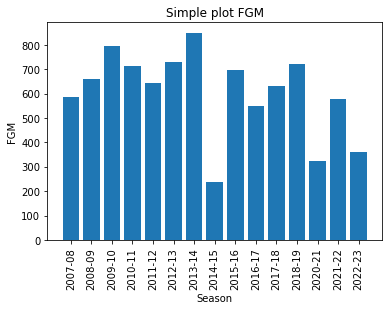

In [24]:
fig, ax = plt.subplots()
ax.bar(KD_yby['SEASON_ID'], KD_yby['FGM'])

ax.set(xlabel='Season', ylabel='FGM',
       title='Simple plot FGM')
plt.xticks(rotation=90)
ax.grid(False)

A quick look at the chart shows 2013-2014 as the highest FGM made, followed by 2014-2015 as the lowest. 
A quick google shows that Durant won the MVP (most valuable player) in 2013-2014 season and was then injured in the 2014-2015 season (only playing 27 games, hence leading to lower FGM). 
<br><br>Perhaps this is better shown including games played. Although I'm not a huge fan of plots sharing axes, this shows some interesting overlayed bars with FGM and Games Played.

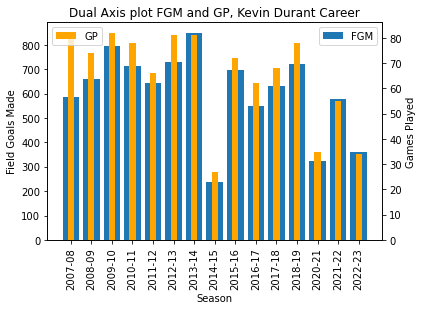

In [25]:
fig, ax = plt.subplots()


width = 0.3

ax.bar(KD_yby['SEASON_ID'], KD_yby['FGM'], label='FGM')
ax.set(xlabel='Season', ylabel='Field Goals Made',
       title='Dual Axis plot FGM and GP, Kevin Durant Career')
plt.xticks(rotation=90)
ax.grid(False)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(KD_yby['SEASON_ID'], KD_yby['GP'],color='orange', label = 'GP', width = width)
ax2.set_ylabel("Games Played")

ax.legend(loc = 'upper right')
ax2.legend(loc = 'upper left')

plt.show()

A few things make sense. In his first season, he played a lot of games but took less shots, expected of a rookie/younger player new into the NBA. Even so, he won rookie of the year (best new player in their first season). His shot taking generally increased in the early years, while the number of games remained relatively similar until MVP in 2013-2014 (a dip in 11/12 with slightly less GP/FGM). Perhaps playing a high number of games in a season is a key consideration for MVP candidates. Season 14/15 and 20/21 show less GP and therefore less FGM due to injury. Overall, he has played less games in his later years compared to his early years in the NBA. Knowing that he also missed games in 2021-2022 due to injury again, he won't be in contention for MVP. It will be interesting to monitor his GP in the coming years.  

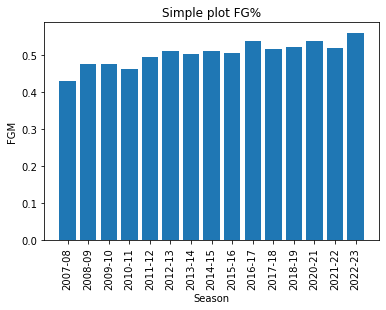

In [26]:
fig, ax = plt.subplots()
ax.bar(KD_yby['SEASON_ID'], KD_yby['FG_PCT'])

ax.set(xlabel='Season', ylabel='FGM',
       title='Simple plot FG%')
plt.xticks(rotation=90)
ax.grid(False)

Impressivley, KD's FG% shows an increasing trend season on season. Perhaps this is better seen in a line chart. Note that the current season 22-23, KD has his highest FG% ever

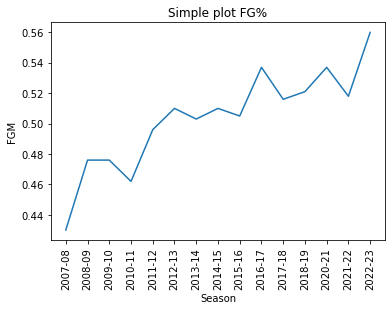

In [27]:
fig, ax = plt.subplots()
ax.plot(KD_yby['SEASON_ID'], KD_yby['FG_PCT'])

ax.set(xlabel='Season', ylabel='FGM',
       title='Simple plot FG%')
plt.xticks(rotation=90)
ax.grid(False)

In [28]:
KD_yby.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201142,2007-08,00,1610612760,SEA,19.0,80,80,2768.0,587,...,0.873,70,278,348,192,78,75,232,122,1624
1,201142,2008-09,00,1610612760,OKC,20.0,74,74,2885.0,661,...,0.863,77,405,482,205,96,53,225,134,1871
2,201142,2009-10,00,1610612760,OKC,21.0,82,82,3239.0,794,...,0.900,105,518,623,231,112,84,271,171,2472
3,201142,2010-11,00,1610612760,OKC,22.0,78,78,3038.0,711,...,0.880,57,476,533,214,88,76,218,159,2161
4,201142,2011-12,00,1610612760,OKC,23.0,66,66,2546.0,643,...,0.860,40,487,527,231,88,77,248,133,1850


In [29]:
KD_yby.TEAM_ABBREVIATION.unique()

array(['SEA', 'OKC', 'GSW', 'BKN'], dtype=object)

In [30]:
# return some grouped stats by team
# if you don't reset_index() (or as_index=False within groupby) then the plots below don't work as groups become the index
# here the groups are Team_Abbreviation. We want to easily select this against grouped metric
KD_team_stats = KD_yby.groupby(['TEAM_ABBREVIATION'])[['GP','GS','MIN','FGM','FGA','FG_PCT']].mean().reset_index()
print(KD_team_stats)

  TEAM_ABBREVIATION         GP         GS          MIN         FGM  \
0               BKN  41.333333  40.333333  1480.666667  421.333333   
1               GSW  69.333333  69.333333  2365.666667  634.000000   
2               OKC  70.125000  70.125000  2680.000000  665.625000   
3               SEA  80.000000  80.000000  2768.000000  587.000000   

           FGA    FG_PCT  
0   788.000000  0.538333  
1  1210.333333  0.524667  
2  1357.750000  0.492250  
3  1366.000000  0.430000  


<BarContainer object of 4 artists>

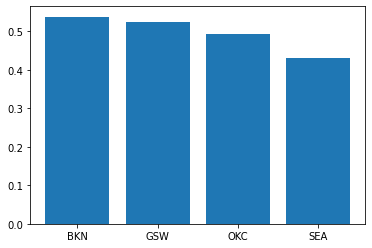

In [31]:
# simple matplotlib bar plot selecting x and y axis values of interest
plt.bar(KD_team_stats['TEAM_ABBREVIATION'],KD_team_stats['FG_PCT'])

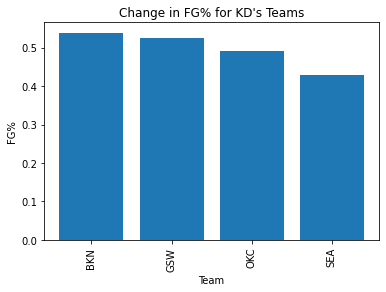

In [32]:
# or here a bit more detailed and add some labels and title, further visual edits possible here
# Plot change in AVG's for the different teams that KD played for
fig, ax = plt.subplots()
ax.bar(KD_team_stats['TEAM_ABBREVIATION'], KD_team_stats['FG_PCT'])

ax.set(xlabel='Team', ylabel='FG%',
       title="Change in FG% for KD's Teams")
plt.xticks(rotation=90)
ax.grid(False)

Above chart shows KD's average FG_PCT is highest with Brooklyn, and also it has improved year on year (year not shown here) by looking at the increase by team progression. 

In [33]:
KD_team_stats

,TEAM_ABBREVIATION,GP,GS,MIN,FGM,FGA,FG_PCT
0,BKN,41.333333,40.333333,1480.666667,421.333333,788.000000,0.538333
1,GSW,69.333333,69.333333,2365.666667,634.000000,1210.333333,0.524667
2,OKC,70.125000,70.125000,2680.000000,665.625000,1357.750000,0.492250
3,SEA,80.000000,80.000000,2768.000000,587.000000,1366.000000,0.430000


Let's look to try and build a shot map, depending on if the data exists in the api

In [34]:
from nba_api.stats.endpoints import shotchartdetail

In [35]:
# Kevin Durant, not sure what this is really
KD_shots = shotchartdetail.ShotChartDetail(player_id=str(KD_ID),team_id=str(GSW_ID))
KD_shots_yby = KD_shots.get_data_frames()[1]
KD_shots_yby.head()

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,3,3,1.0
1,League Averages,Above the Break 3,Center(C),24+ ft.,2295,2295,1.0
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,3736,3736,1.0
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,3381,3381,1.0
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,2,2,1.0


In [36]:
KD_shots_yby_1 = KD_shots.get_data_frames()[0]
KD_shots_yby_1.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM


In [37]:
# taken from https://stackoverflow.com/questions/65627725/how-to-get-nba-shot-chart-data-correctly

import json

response = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=0,
    season_nullable='2022-23',
    context_measure_simple = 'FGA', # default is only made shots so set this explicitly to attempted FG (I think)
    season_type_all_star='Regular Season'
)

content = json.loads(response.get_json())

results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
df = pd.DataFrame(rows, columns=headers)
#df.columns = headers

# write to csv file
#df.to_csv(r'C:\Users\Comp\Desktop\nba_2001-02.csv', index=False)

In [38]:
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200001,7,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,11,38,...,Left Side(L),8-16 ft.,12,-118,50,1,0,20221018,BOS,PHI
1,Shot Chart Detail,0022200001,11,203935,Marcus Smart,1610612738,Boston Celtics,1,11,15,...,Right Side(R),8-16 ft.,13,120,55,1,1,20221018,BOS,PHI
2,Shot Chart Detail,0022200001,12,202699,Tobias Harris,1610612755,Philadelphia 76ers,1,11,5,...,Center(C),8-16 ft.,14,50,135,1,0,20221018,BOS,PHI
3,Shot Chart Detail,0022200001,14,202699,Tobias Harris,1610612755,Philadelphia 76ers,1,11,3,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20221018,BOS,PHI
4,Shot Chart Detail,0022200001,15,1628369,Jayson Tatum,1610612738,Boston Celtics,1,10,46,...,Left Side(L),24+ ft.,23,-232,49,1,1,20221018,BOS,PHI


In [39]:
df.shape

(91959, 24)

In [40]:
# what is the average made shot percentage 
# divide the sum of the shot_made_flag column by the total rows of the dataset
df.SHOT_MADE_FLAG.sum() / df.shape[0]

0.47051403342794074

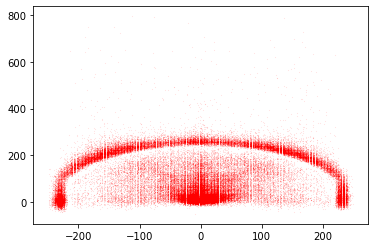

In [41]:
# below idea taken from sports analytics Foundational course on Coursera 
# quick scatter on the shot locations

x = df['LOC_X']
y = df['LOC_Y']
plt.scatter(x,y, s=.005,c='r', marker= '.')

(466.5, 933.0)

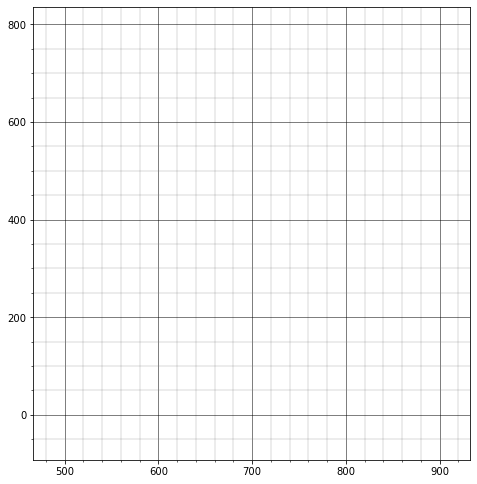

In [42]:
# play with below to try and manipulate chart sizes and show shot locations on a grid plot
plt.figure(figsize=(94/12,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.') 
plt.minorticks_on()
plt.grid(which='major', linewidth='.5', color='black')
plt.grid(which='minor', linewidth='.3', color='grey')
plt.xlim(933/2, 933)

Next goal is to try and build a make/miss shot chart for one player (KD?), or perhaps players at different positions to show their make miss. Would be interesting to see if Centres are taking more three from say this year to 5 years ago.

Do this by filtering the shot chart detail df above to one player and mark made shots in a different colour to missed shots